In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('../../data/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Check the dimensions of dataframe

In [24]:
df.shape

(2768, 10)

### Check whether there are missing values in dataset

In [25]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check whether there are duplicate instances in dataframe

In [26]:
df.loc[df.duplicated()]

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Check the overall details about the dataframe

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


### Print all int and float type variables

In [28]:
print([x for x in df.columns if df[x].dtype in ('int64', 'float64')])

['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### Drop the Id column

In [29]:
df = df.drop('Id', axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Correlation Heatmap

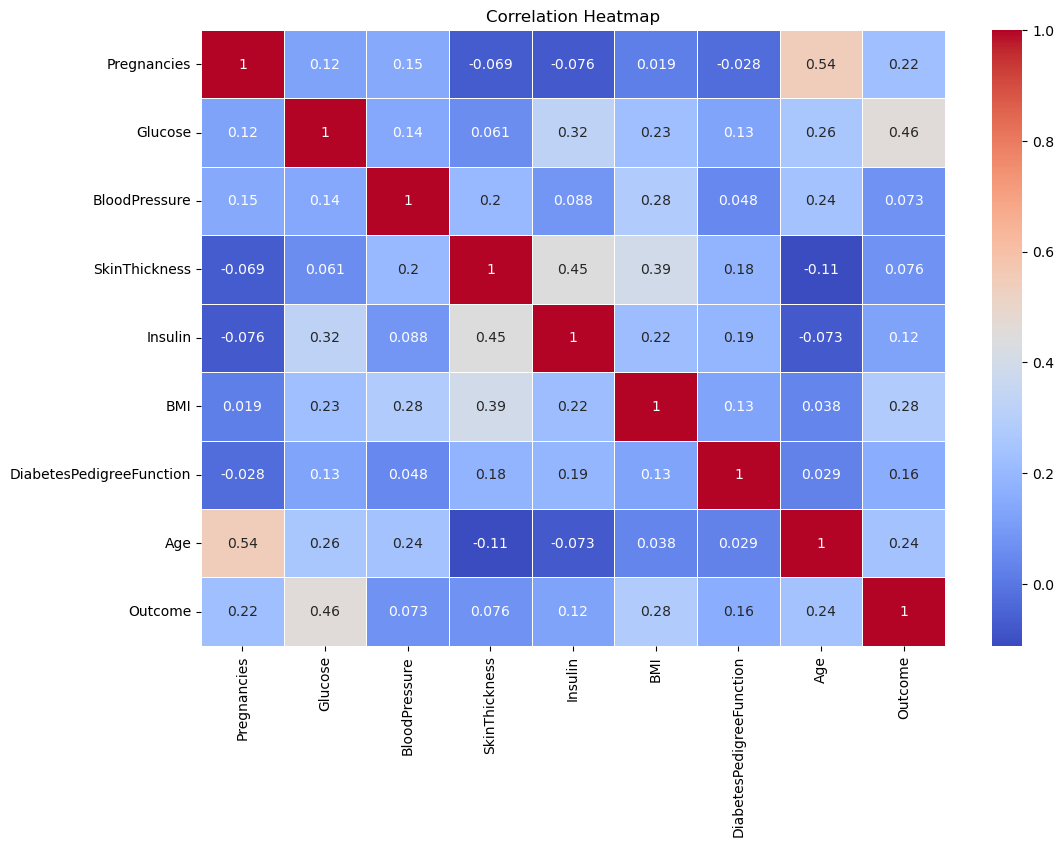

In [30]:
numerical_features = df.columns
cor_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Visualising Numerical Features

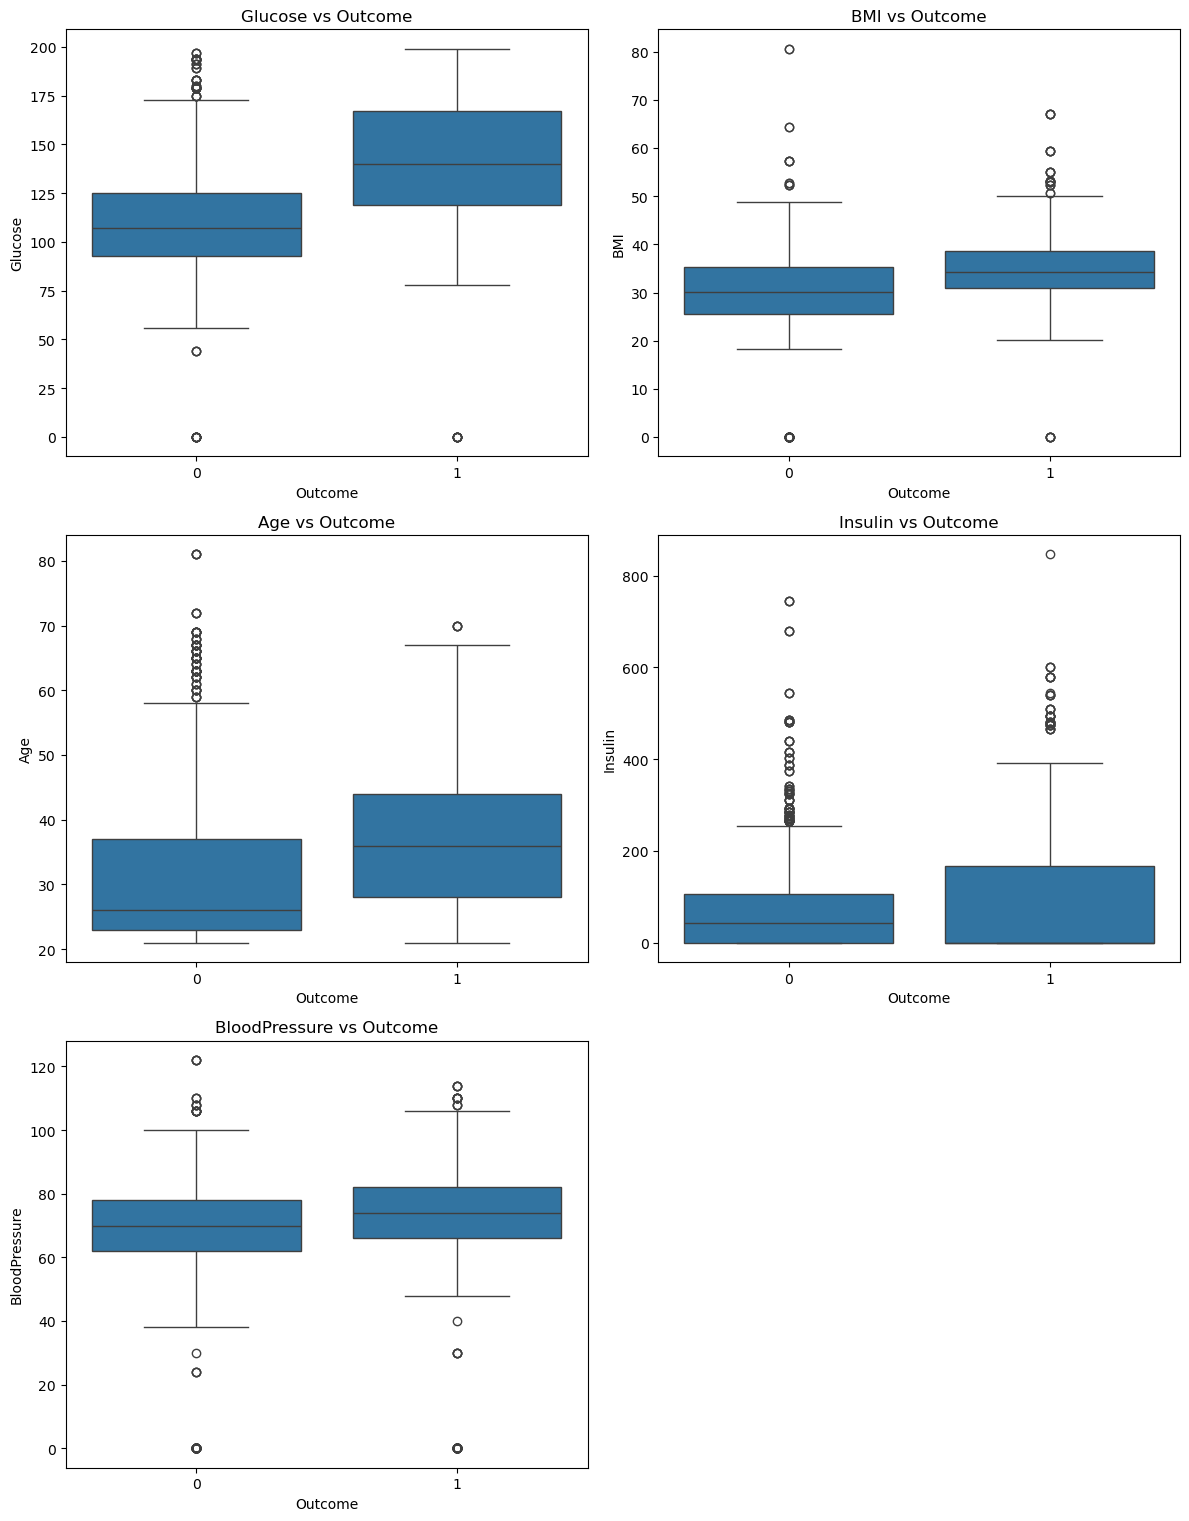

In [31]:
def boxplot(x, fig):
    plt.subplot(5, 2, fig)
    sns.boxplot(x='Outcome', y=x, data=df)
    plt.title(x + ' vs Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(x)

plt.figure(figsize=(12, 25))

boxplot('Glucose', 1)
boxplot('BMI', 2)
boxplot('Age', 3)
boxplot('Insulin', 4)
boxplot('BloodPressure', 5)

plt.tight_layout()
plt.show()

### Feature Distribution and Outcome Comparison

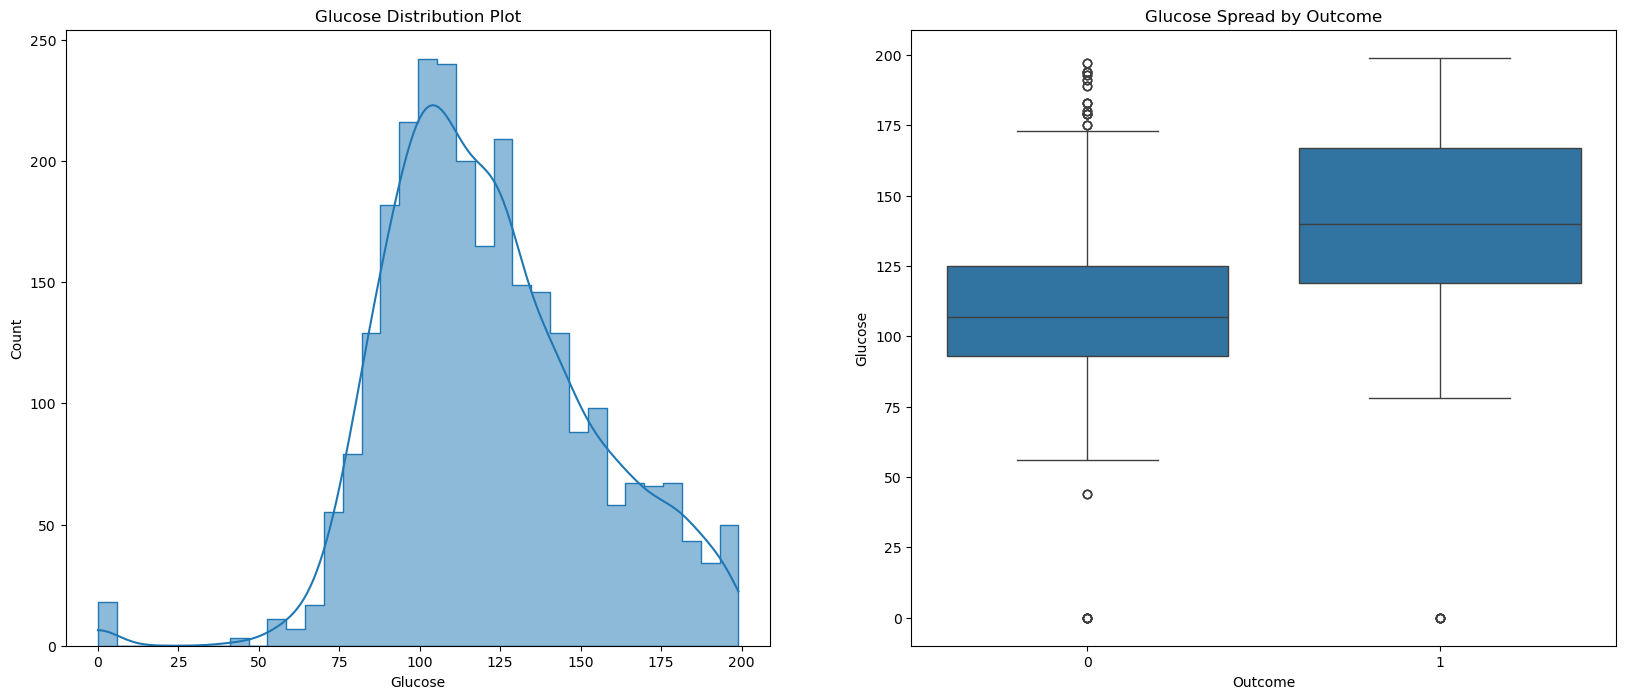

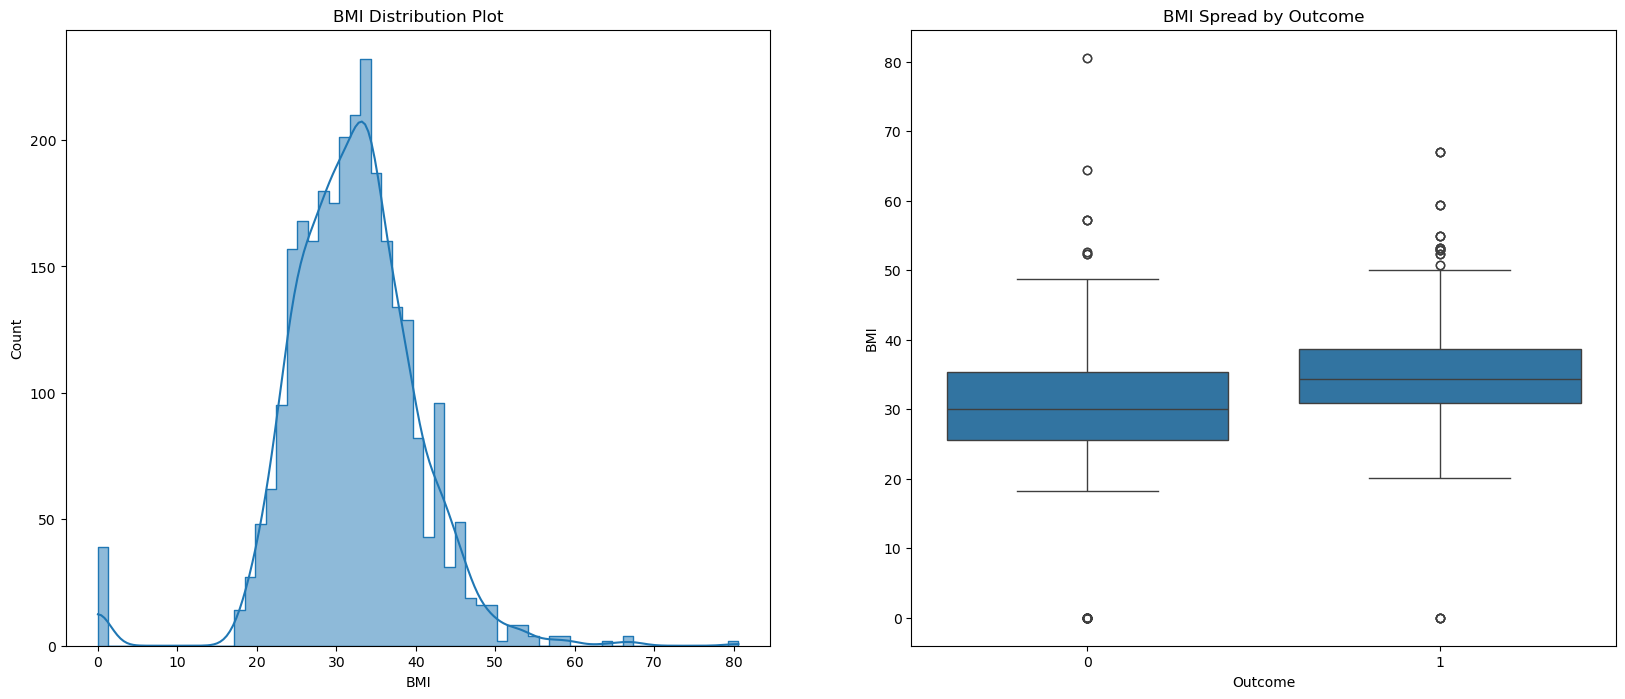

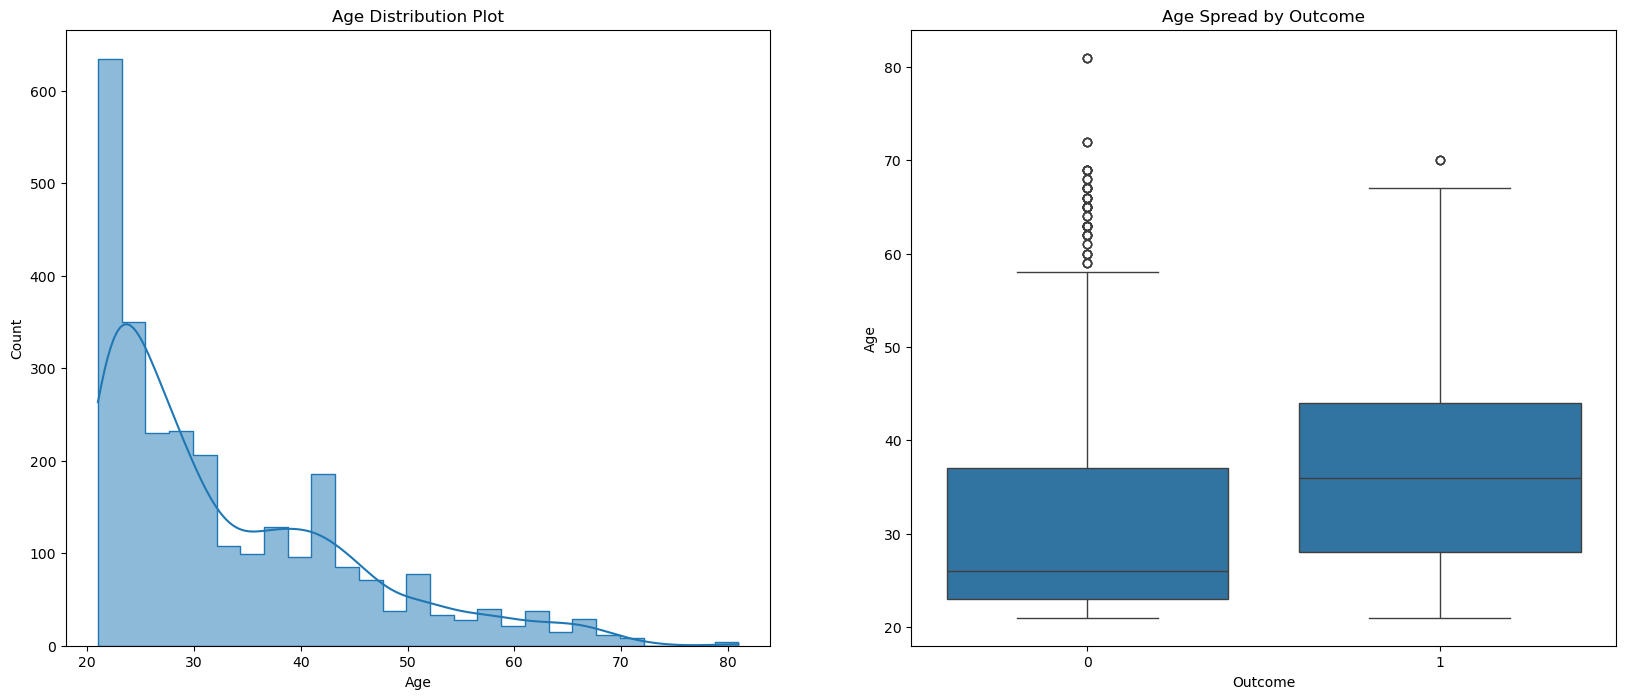

In [32]:
for col in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, element='step')
    plt.title(f'{col} Distribution Plot')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} Spread by Outcome')
    
    plt.show()


### Split dataset into Train, Validation and  Test

In [33]:
features = df.columns.drop('Outcome')
target = 'Outcome'

X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target],
    train_size=0.85, test_size=0.15, random_state=1234
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    train_size=0.85, test_size=0.15, random_state=1234
)

 ### Dataset Splitting Overview

In [34]:
X_train.shape, X_val.shape, X_test.shape

((1999, 8), (353, 8), (416, 8))

### Trasfering Splitted dataset

In [35]:
 X_test.to_csv('../../src/FC212002_Janith/splits/X_test_dataset.csv', index=False)

In [36]:
 X_train.to_csv('../../src/FC212002_Janith/splits/X_train_dataset.csv', index=False)

In [37]:
 X_val.to_csv('../../src/FC212002_Janith/splits/X_validation_dataset.csv', index=False)

In [38]:
  y_test.to_csv('../../src/FC212002_Janith/splits/y_test_dataset.csv', index=False)

In [39]:
  y_train.to_csv('../../src/FC212002_Janith/splits/y_train_dataset.csv', index=False)

In [40]:
 y_val.to_csv('../../src/FC212002_Janith/splits/y_validation_dataset.csv', index=False)